In [12]:
from matplotlib.pyplot import *
from prospectorFunctions import *
import time
import itertools
# imports getModel, getSps, getObs, getTheta, getModelPlot
# H: show keyboard shortcuts

In [13]:
start = time.time()

# Setting the dictionary of parameters to go into getModel, getSps, and getObs

# mass, zred, tage = 1e8, 1.0, 13. (default values used in getModel)

run_params = {'mass':1e8,
              'zred':1.0,
              'tage':13.,
              'fixed_metallicity':None,
              'snr':10.0,
              'ldist':10.0,
              'add_duste':False,
              'zcontinuous':1,
              }
              # The observations specified in `obj` above are object specific

sps = getSps(**run_params)
obs = getObs(**run_params)

end = time.time()
print(round(end-start,2))

12.77


In [33]:
start = time.time()

masses = [1e7,1e8]    # [1e6,1e8,1e10]       <- Initital ranges ralf picked
tages = [12.,13.,14.]       # [1e6,1e7,1e8]     |
zreds = [0,1,2]  # [0,1,2,3,4]                  V

params_name = ['mass', 'tage', 'zred']#, 'z']

data_grid_params = np.empty((len(masses),len(tages),len(zreds),len(params)))
# Will be in order of how params is added in for loop
print(data_grid_params.shape)

data_grid_spec = np.empty((len(masses),len(tages),len(zreds),sps.wavelengths.shape[0]))
print(data_grid_spec.shape)

data_grid_phot = np.empty((len(masses),len(tages),len(zreds),len(obs['phot_wave'])))
print(data_grid_phot.shape)

for i_mass,i_tage,i_zred in itertools.product(range(len(masses)), range(len(tages)), range(len(zreds))):
    mass = masses[i_mass]
    tage = tages[i_tage]
    zred = zreds[i_zred]
    
    run_params['mass'] = mass
    run_params['tage'] = tage
    run_params['zred'] = zred
    
    model = getModel(**run_params)
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)
    
    data_grid_params[i_mass, i_tage, i_zred, :] = [mass, tage, zred] # This defines the index order of the parameters (will have to change if changed in getModelPlot)
    data_grid_spec[i_mass, i_tage, i_zred, :] = init_spec
    data_grid_phot[i_mass, i_tage, i_zred, :] = init_phot
    
end = time.time()

(2, 3, 3, 3)
(2, 3, 3, 5994)
(2, 3, 3, 11)


In [94]:
def getModelPlot(obs,sps,init_spec,init_phot,mass=None,tage=None,zred=None,**params):
    
#     [mass, tage, zred] <- current order of parameter indexing
    
    figure(figsize=(16,8))
    
    wphot = obs['phot_wave']
    
    a = 1.0 + zred
    
    if obs['wavelength'] is None:
        wspec = sps.wavelengths
        wspec *= a
    else:
        wspec = obs['wavelength']
    
    loglog(wspec, init_spec)
    errorbar(wphot, init_phot, marker='s', color='gray', alpha=0.8,
             ls='', lw=3, markeredgewidth=3)
    
    xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
    temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4

    title(f"mass={mass}, zred={zred}, tage={tage}", fontsize=15)
    xlabel('Wavelength [A]', fontsize=15)
    ylabel('Flux Density [maggies]', fontsize=15)
    xlim([xmin, xmax])
    ylim([ymin, ymax])
    xscale('log')
    yscale('log')
#     legend(fontsize=15)
    tight_layout()
    show()

In [27]:
a,b,c = 0,0,0

params = {'mass':data_grid_params[a,b,c,0],
          'tage':data_grid_params[a,b,c,1],
          'zred':data_grid_params[a,b,c,2],
          }
params

{'mass': np.float64(12.0),
 'tage': np.float64(10000000.0),
 'zred': np.float64(0.0)}

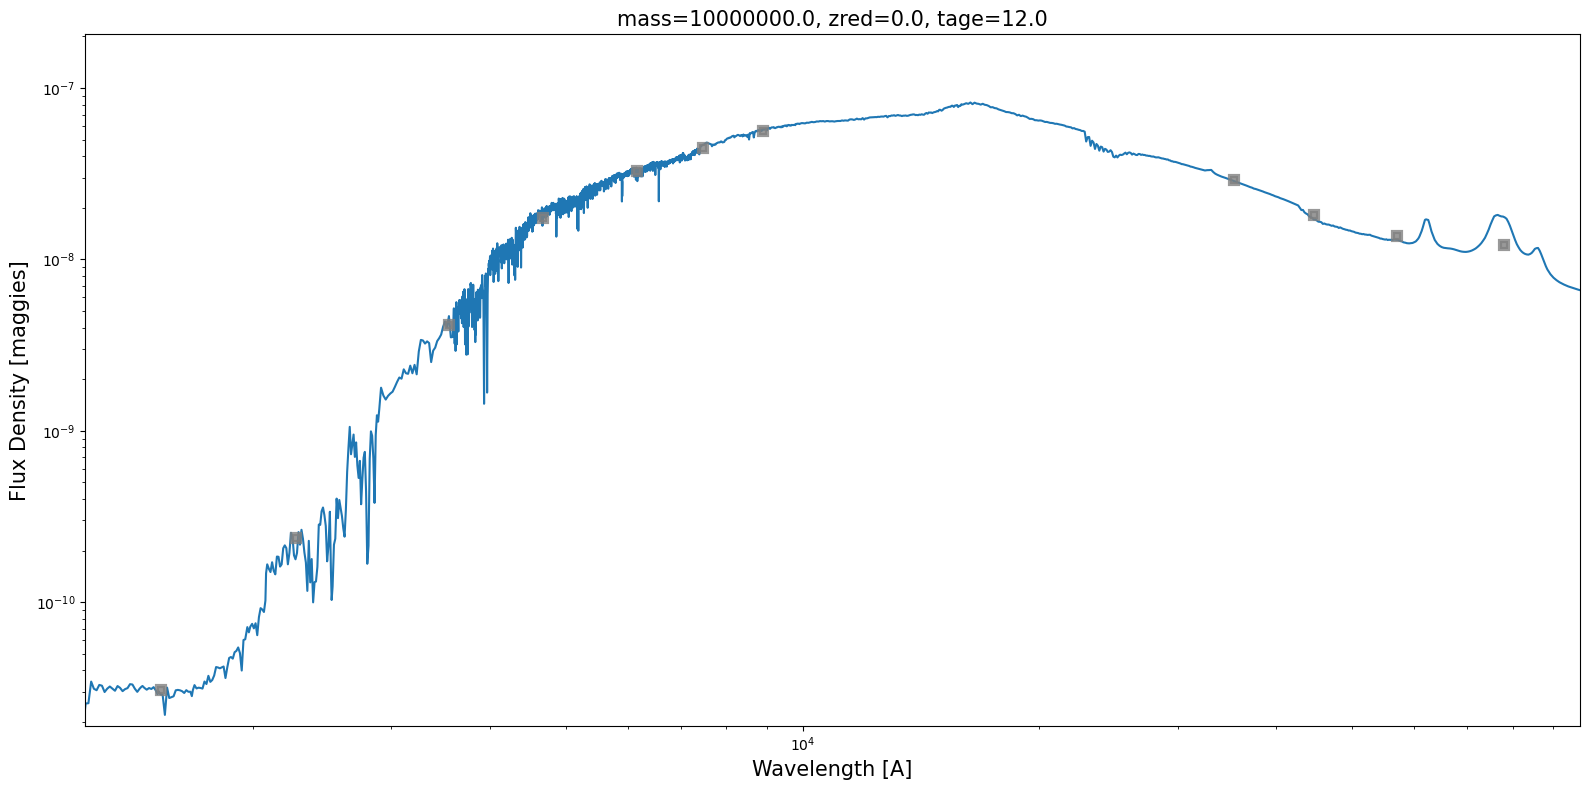

In [39]:
a,b,c = 0,0,0

params = {'mass':data_grid_params[a,b,c,0],
          'tage':data_grid_params[a,b,c,1],
          'zred':data_grid_params[a,b,c,2],
          }

getModelPlot(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**params)

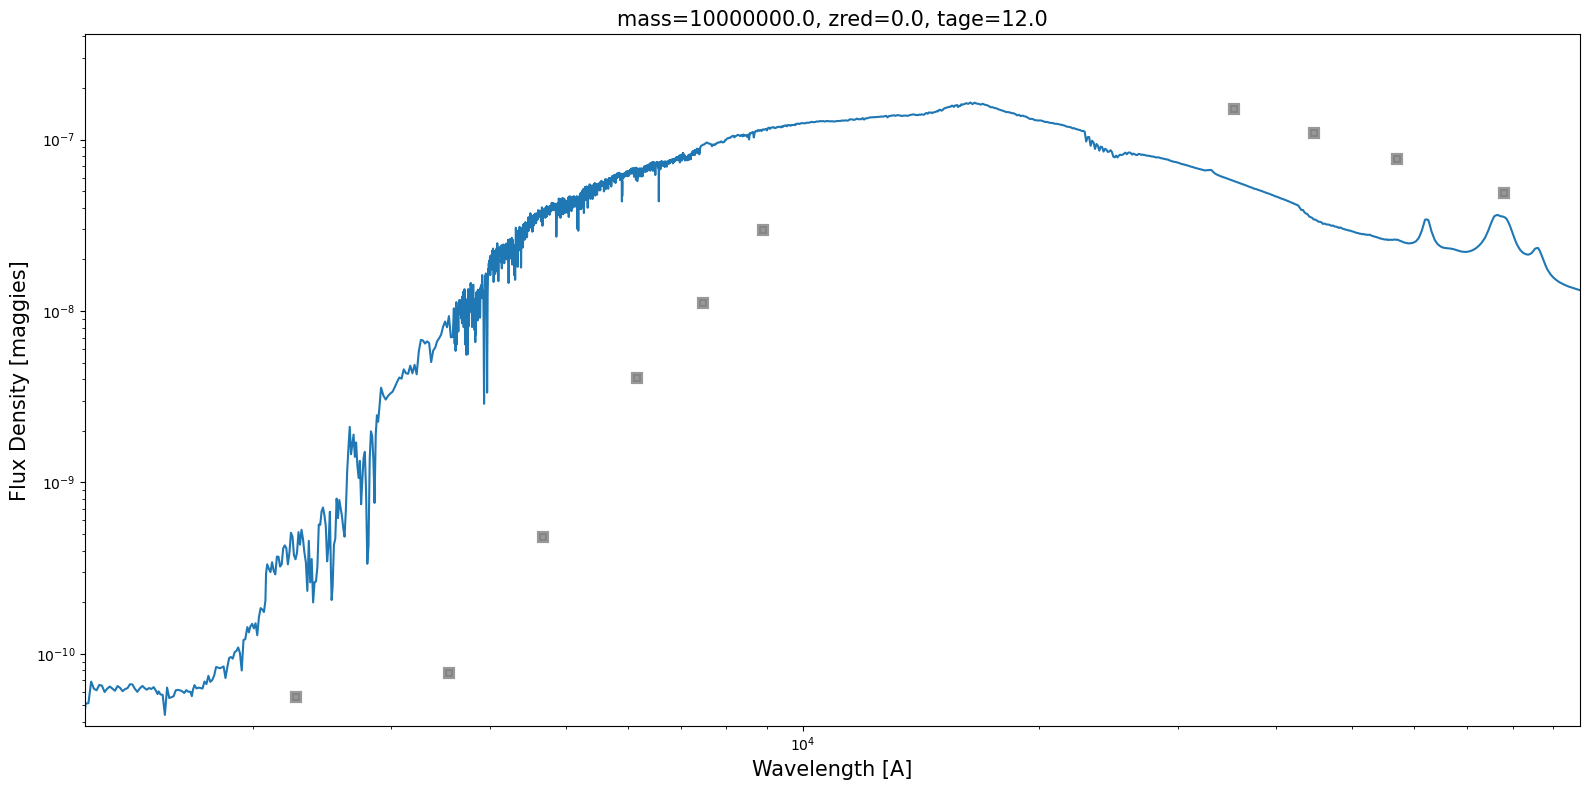

In [40]:
a,b,c = 0,0,1

getModelPlot(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**params)

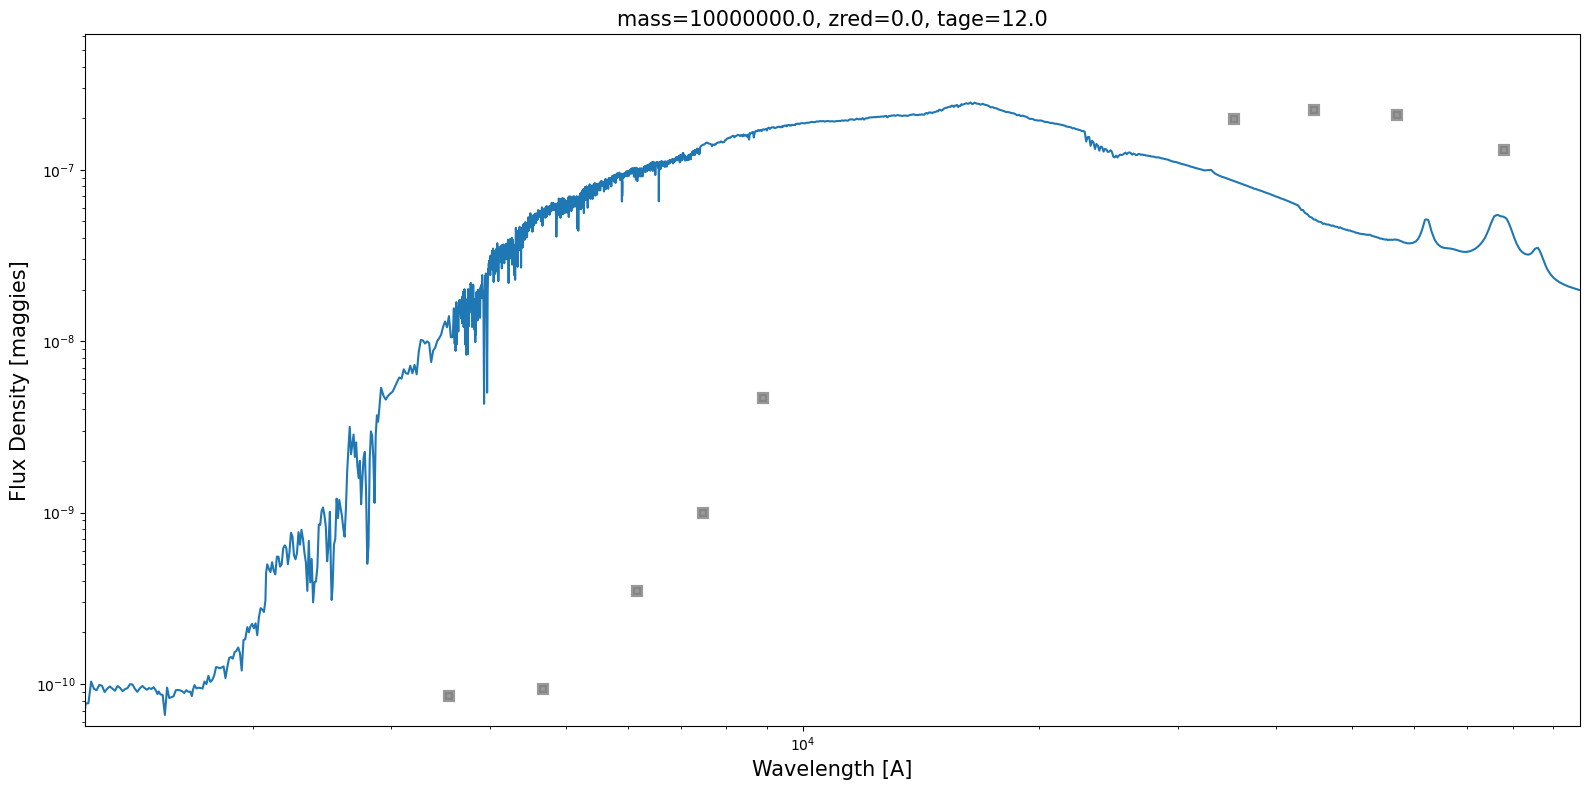

In [41]:
a,b,c = 0,0,2

getModelPlot(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**params)

In [35]:
import numpy as np

masses = [1e7,1e8]    # [1e6,1e8,1e10]       <- Initital ranges ralf picked
tages = [12.,13.,14.]       # [1e6,1e7,1e8]     |
zreds = [0,1,2]  # [0,1,2,3,4]                  V
dusts = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0] # 0.05 initial value in demo
metals = [-1.0, -0.5, 0.0, 0.5]

params_name = ['mass', 'tage', 'zred']

data_grid_params = np.empty((len(masses),len(tages),len(zreds),len(params_name)))
print(data_grid_params.shape)
# Will be in order of how params is added in for loop

data_grid_spec = np.empty((len(masses),len(tages),len(zreds),sps.wavelengths.shape[0]))
print(data_grid_spec.shape)

data_grid_phot = np.empty((len(masses),len(tages),len(zreds),len(obs['phot_wave'])))
print(data_grid_phot.shape)

for i_mass,i_tage,i_zred in itertools.product(range(len(masses)), range(len(tages)), range(len(zreds))):
    
    mass = masses[i_mass]
    tage = tages[i_tage]
    zred = zreds[i_zred]
    
#     print([mass,tage,zred]==[masses[i_mass],tages[i_tage],zreds[i_zred]])
    
    run_params['mass'] = mass
    run_params['tage'] = tage
    run_params['zred'] = zred
    
#     print(run_params)
    
    model = getModel(**run_params)
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)

    data_grid_params[i_mass, i_tage, i_zred, :] = [mass, tage, zred] # This defines the index order of the parameters (will have to change if changed in getModelPlot)
    data_grid_spec[i_mass, i_tage, i_zred, :] = init_spec
    data_grid_phot[i_mass, i_tage, i_zred, :] = init_phot

(2, 3, 3, 3)
(2, 3, 3, 5994)
(2, 3, 3, 11)


In [36]:
data_grid_spec[0,0,0,:]

array([2.98704847e-16, 3.22939787e-16, 3.79392707e-16, ...,
       3.98737399e-12, 3.88186358e-12, 3.78174837e-12], shape=(5994,))

In [47]:
params_name

['mass', 'tage', 'zred']

In [51]:
# Plotting the tage parameter

# lists of params: masses, tages, zreds
# lists of params: params_name

figure(figsize=(16,8))

wphot = obs['phot_wave']

for i in range(len(elems)):
    print(elems[i])
    
    a = 1.0 + zred

#     if obs['wavelength'] is None:
#         wspec = sps.wavelengths
#         wspec *= a
#     else:
#         wspec = obs['wavelength']

#     init_spec = data_grid_spec[a,b,c,:]
#     init_phot = data_grid_phot[a,b,c,:]
    
    
# loglog(wspec, init_spec)
# errorbar(wphot, init_phot, marker='s', color='gray', alpha=0.8,
#          ls='', lw=3, markeredgewidth=3)
    
# xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
# temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
# ymin, ymax = temp.min()*0.8, temp.max()/0.4

# title(f"mass={mass}, zred={zred}, tage={tage}", fontsize=15)
# xlabel('Wavelength [A]', fontsize=15)
# ylabel('Flux Density [maggies]', fontsize=15)
# xlim([xmin, xmax])
# ylim([ymin, ymax])
# xscale('log')
# yscale('log')
# # legend(fontsize=15)
# tight_layout()
# show()

0
1
2


<Figure size 1600x800 with 0 Axes>

### List of filters & photometry taken of *The Cliff* with JWST:
- NIRCam/F090W:    0.0148
- NIRCam/F115W:    0.028
- NIRCam/F150W:    0.0268
- NIRCam/F200W:    0.322
- NIRCam/F277W:    1.090
- NIRCam/F356W:    1.334
- NIRCam/F410M:    1.597
- NIRCam/F444W:    1.725
- MIRI/F770W:      1.54
- MIRI/F1800W:     1.96

`filternames = ['jwst_f090w', 'jwst_f115w', 'jwst_f150w', 'jwst_f200w', 'jwst_f277w', 'jwst_f356w', 'jwst_f410m', 'jwst_f444w', 'jwst_f770w', 'jwst_f1800w']`

`obs_data = [0.0148, 0.028, 0.0268, 0.322, 1.090, 1.334, 1.597, 1.725, 1.54, 1.96]`

In [60]:
def getObs(snr=10, ldist=10.0, **extras_):

    from prospect.utils.obsutils import fix_obs
    import sedpy
    import numpy as np

    # obs is a dictionary of observational data to use for the fit
    obs = {}

    filternames = ['jwst_f090w', 'jwst_f115w', 'jwst_f150w', 'jwst_f200w', 'jwst_f277w',
                   'jwst_f356w', 'jwst_f410m', 'jwst_f444w', 'jwst_f770w', 'jwst_f1800w']
    obs['filters'] = sedpy.observate.load_filters(filternames)

    ################################################# FIX THE UNITS OF THIS DATA
    M_AB = np.array([0.0148, 0.028, 0.0269, 0.322, 1.090, 1.334, 1.597, 1.725, 1.54, 1.96]) # These are currently in units of microJanskeys (fix)
    ################################################# FIX THE UNITS OF THIS DATA

    # jansky_to_maggie_factor = 3631.0

    dm = 25 + 5.0 * np.log10(ldist)
    mags = M_AB + dm

    obs['maggies'] = 10**(-0.4*mags)
    obs['maggies_unc'] = (1./snr) * obs['maggies']

    # obs['phot_mask'] = np.array(['spitzer' not in f.name for f in obs['filters']])
    obs['phot_wave'] = np.array([f.wave_effective for f in obs['filters']])

    obs['wavelength'] = None
    obs['spectrum'] = None
    obs['unc'] = None
    obs['mask'] = None

    obs = fix_obs(obs)
    
    return obs

--------------------
# Ignore file ^^
------------------

In [75]:
# tages = [12.,13.,14.]
tages = np.linspace(12, 13, 3)
# dusts = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
dusts = np.linspace(0,3,7)
# metals = [-1.0, -0.5, 0.0, 0.5]
metals = np.linspace(-1,.5,4)

zred = 3.548

In [92]:

# Setting init values to run getObs and getSps
run_params = {'mass':1e8, # Arbitrary mass since mass is a scaling factor for the spectrum
              'zred':3.548, # Actual redshift for The Cliff
              'tage':13., # Arbitrary value to generate 
              'logzsol':None,
              'dust2':None,
              'snr':10.0,
              'ldist':10.0,
              'add_duste':False,
              'zcontinuous':1,
              }

obs = getObs(**run_params)
sps = getSps(**run_params)

# Setting ranges for variable parameters to generate SED models
tages = np.linspace(12, 13, 3)
dusts = np.linspace(0,3,7)
metals = np.linspace(-1,.5,4)

# data_grid_params will be in order of how params are added in the for loop
data_grid_params = np.empty((len(tages),len(dusts),len(metals),5)) # Hard-coded 5 since we care about 5 variables
# print(data_grid_params.shape)

data_grid_spec = np.empty((len(tages),len(dusts),len(metals),sps.wavelengths.shape[0]))
# print(data_grid_spec.shape)

data_grid_phot = np.empty((len(tages),len(dusts),len(metals),len(obs['phot_wave'])))
# print(data_grid_phot.shape)

for i_tage,i_dust,i_metal in itertools.product(range(len(tages)), range(len(dusts)), range(len(metals))):
    
    tage = tages[i_tage]
    dust = dusts[i_dust]
    metal = metals[i_metal]
    
    run_params['tage'] = tage
    run_params['dust2'] = dust
    run_params['logzsol'] = metal
    
#     print(run_params)
    
    model = getModel(**run_params)
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)
    
    data_grid_params[i_tage, i_dust, i_metal, :] = [run_params['mass'], run_params['zred'], tage, metal, dust] # This defines the index order of the parameters (will have to change if changed in getModelPlot)
    data_grid_spec[i_tage, i_dust, i_metal, :] = init_spec
    data_grid_phot[i_tage, i_dust, i_metal, :] = init_phot

In [123]:
# dict(run_params.keys())[:5]
# data_grid_params[a,b,c,:]

import itertools

first_five_keys = list(itertools.islice(run_params, 5))
extras = {key: value for key,value in zip(first_five_keys, data_grid_params[a,b,c,:])}
extras

{'mass': np.float64(100000000.0),
 'zred': np.float64(3.548),
 'tage': np.float64(12.0),
 'logzsol': np.float64(-1.0),
 'dust2': np.float64(0.0)}

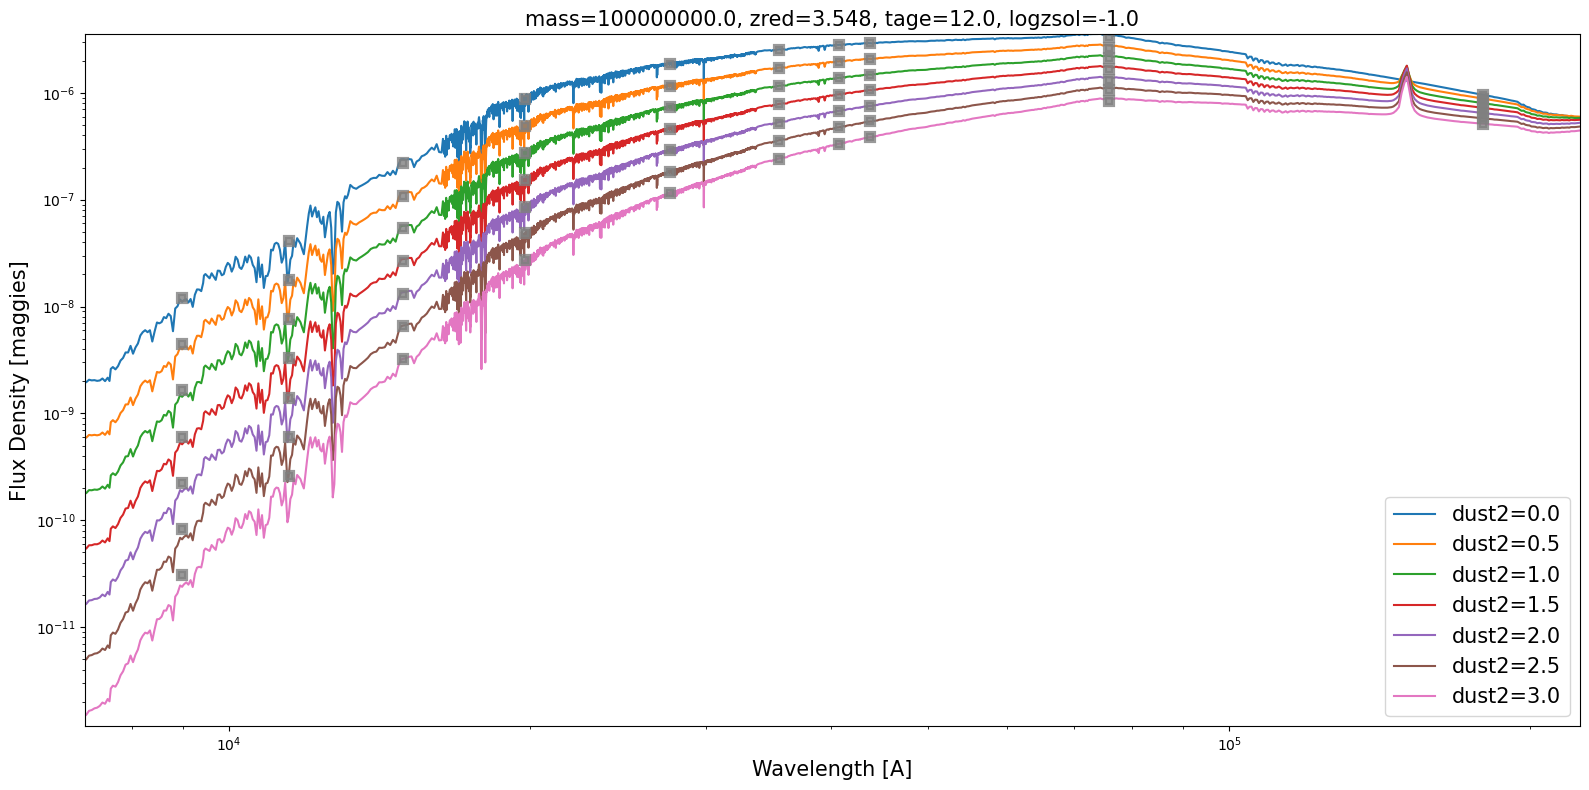

In [141]:
################################################################################################
# MAKE SURE TO FIX THE YMIN AND YMAX TO SET LIMITS FOR THESE PLOTS IN THE getModelPlot FUNCTIONS
################################################################################################

figure(figsize=(16,8))

a,c = 0,0

for b in range(len(dusts)):

    first_five_keys = list(itertools.islice(run_params, 5))
    extras = {key: value for key,value in zip(first_five_keys, data_grid_params[a,b,c,:])}

    getModelPlotDust2(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**extras)

show()

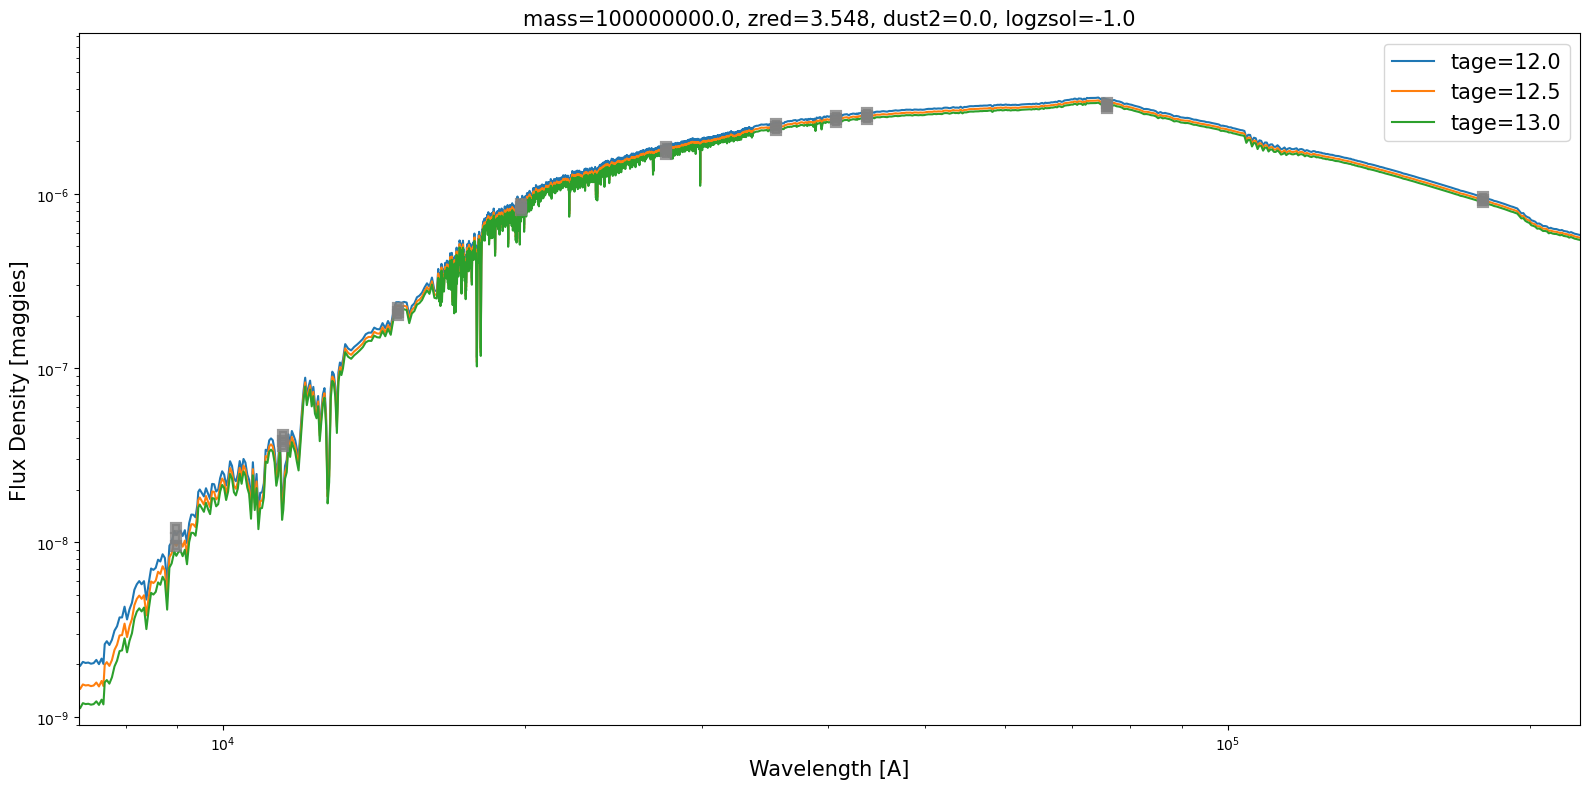

In [146]:
figure(figsize=(16,8))

b,c = 0,0

for a in range(len(tages)):

    first_five_keys = list(itertools.islice(run_params, 5))
    extras = {key: value for key,value in zip(first_five_keys, data_grid_params[a,b,c,:])}

    getModelPlotTage(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**extras)

show()

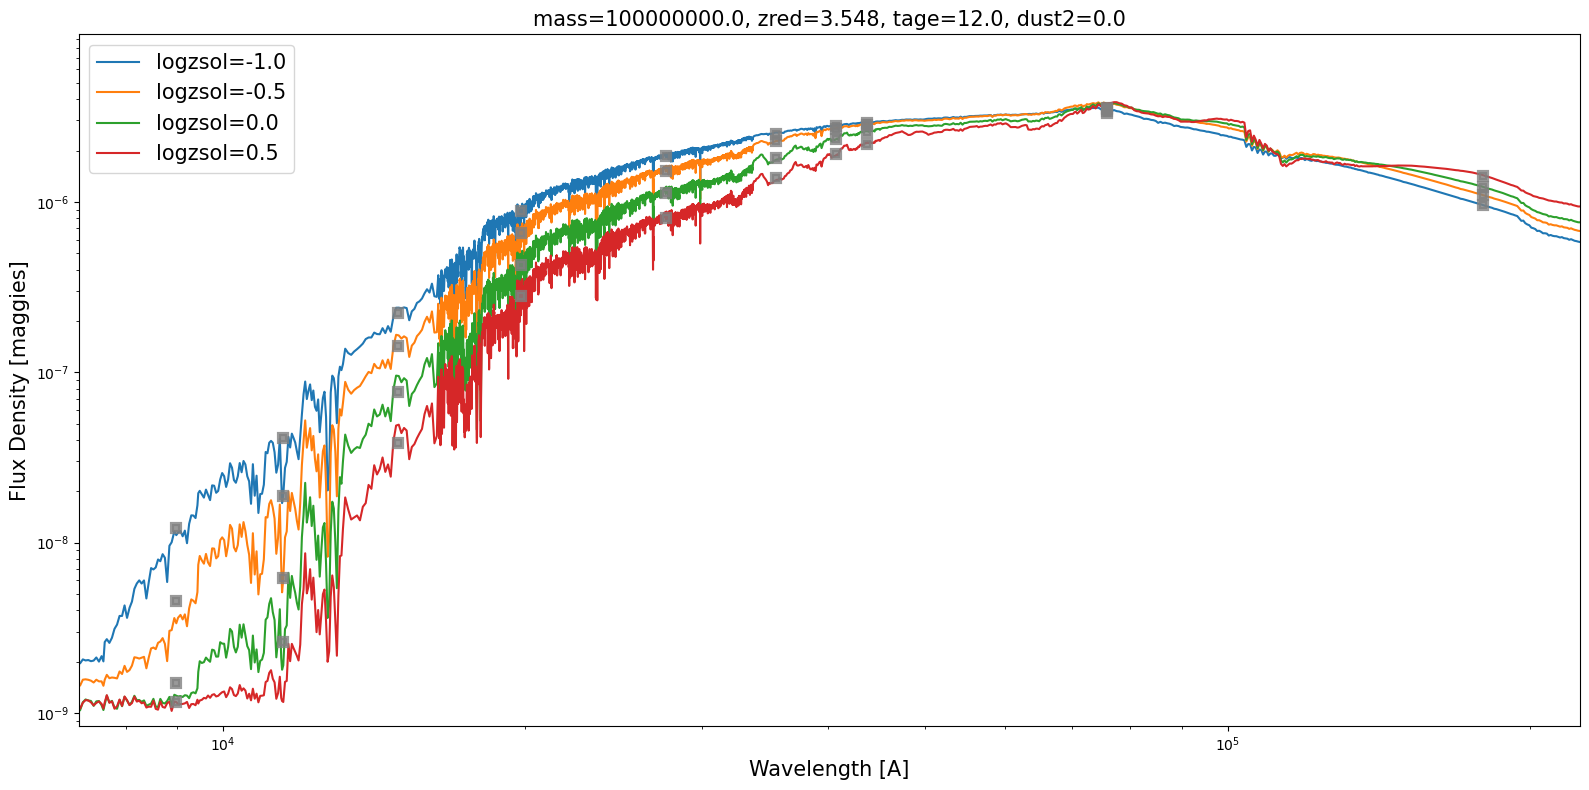

In [148]:
figure(figsize=(16,8))

a,b = 0,0

for c in range(len(metals)):

    first_five_keys = list(itertools.islice(run_params, 5))
    extras = {key: value for key,value in zip(first_five_keys, data_grid_params[a,b,c,:])}

    getModelPlotLogzsol(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**extras)

show()

In [164]:
print(data_grid_params.shape) # a: tages, b: dusts, c:metals
run_params.keys()

(3, 7, 4, 5)


array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

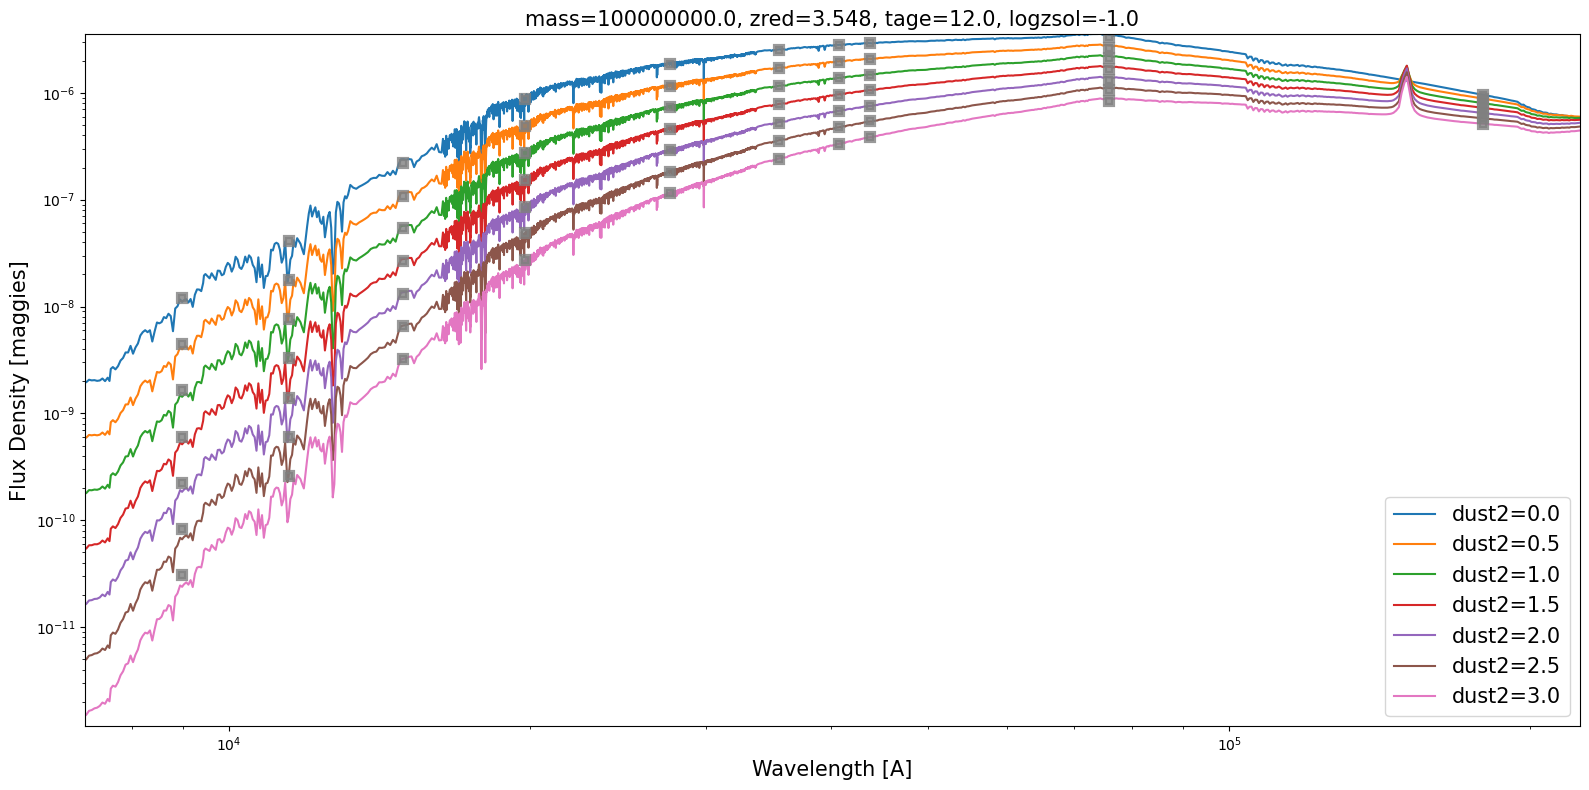

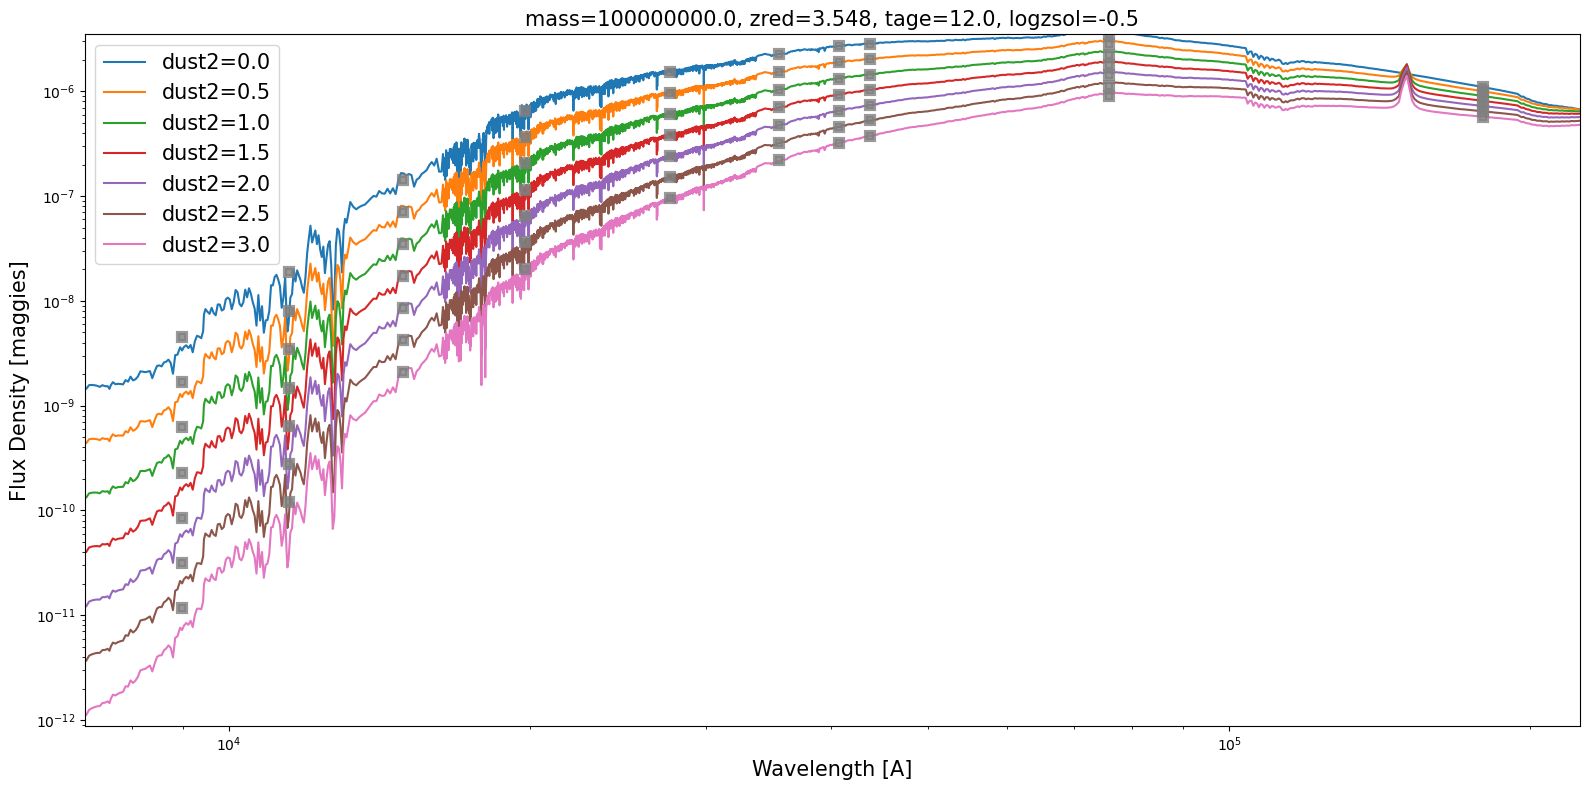

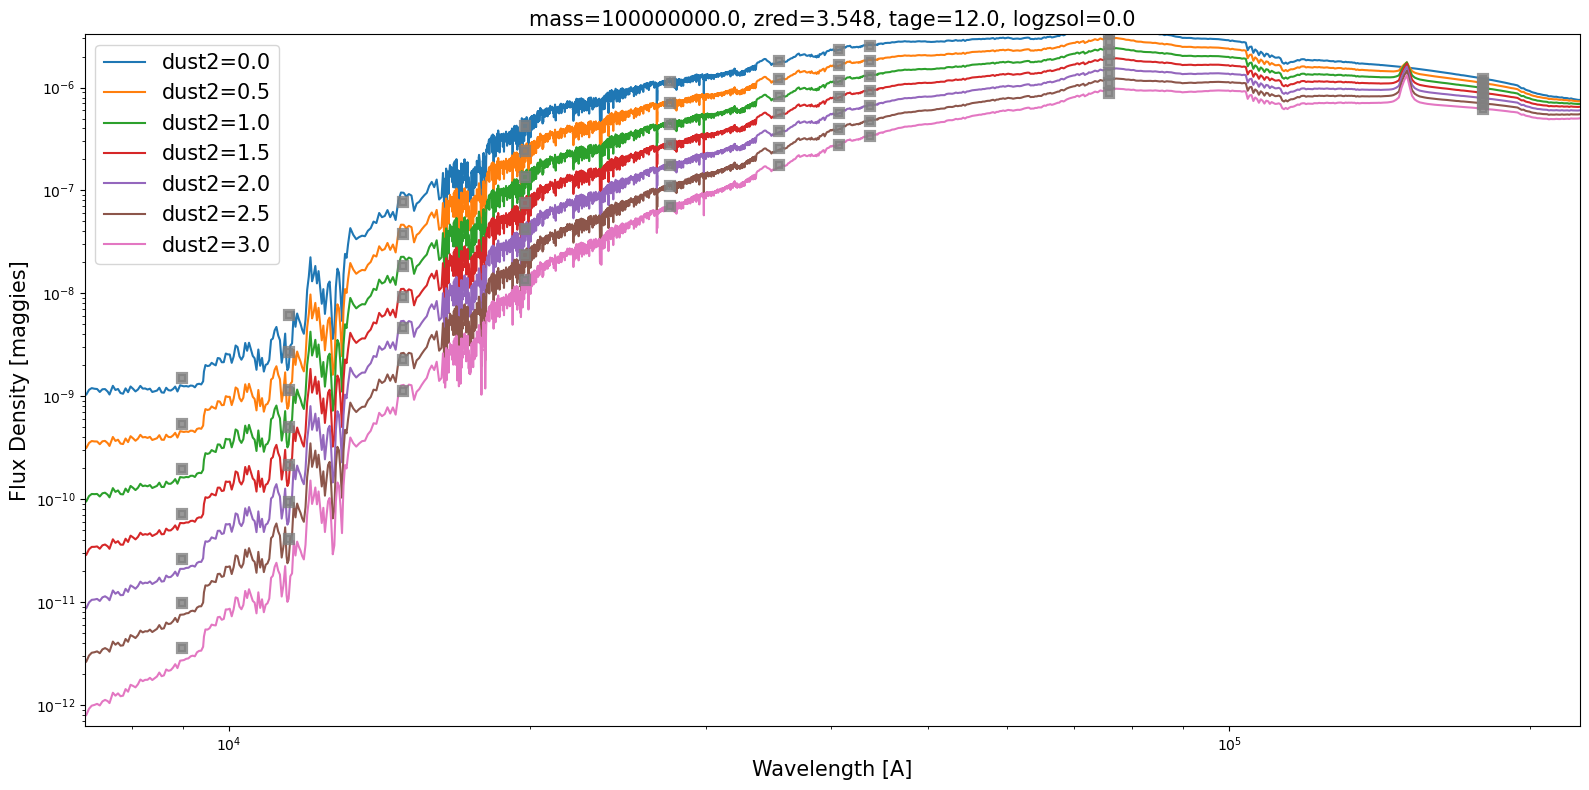

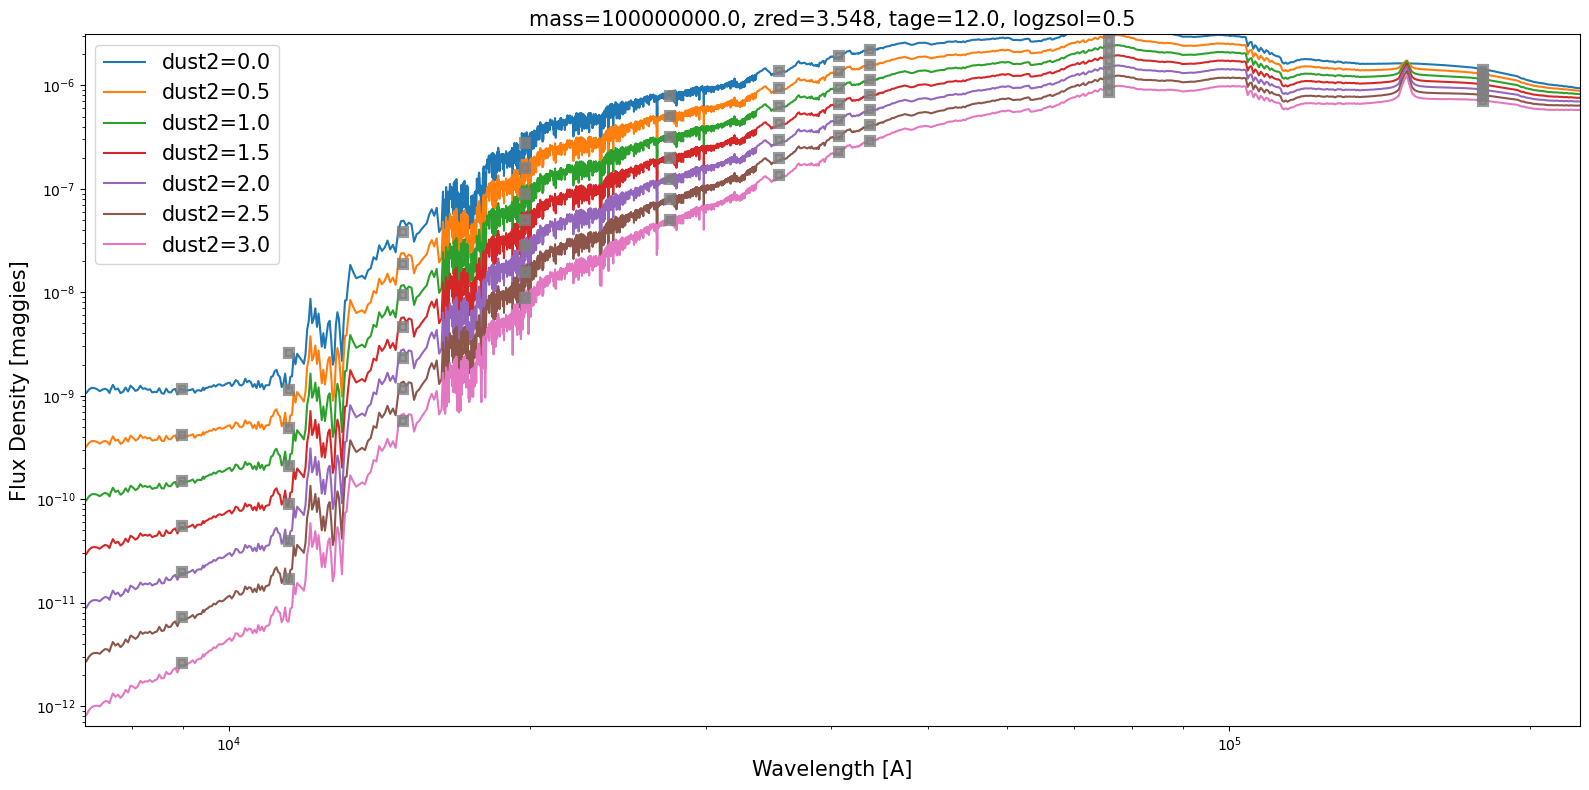

In [165]:
a = 0

for c in range(len(metals)):
    
    figure(figsize=(16,8))
    
    for b in range(len(dusts)):

        first_five_keys = list(itertools.islice(run_params, 5))
        extras = {key: value for key,value in zip(first_five_keys, data_grid_params[a,b,c,:])}

        getModelPlotDust2(obs,sps,data_grid_spec[a,b,c,:],data_grid_phot[a,b,c,:],**extras)

    show()

In [76]:
######################################################################################
# NEED TO PUT THIS VERSION OF THE getModel FUNCTION BACK INTO prospectorFunctions FILE
######################################################################################


def getModel(mass=None, zred=None, tage=None, logzsol=None, dust2=None, ldist=10.0, add_duste=False, **extras):
    from prospect.models.sedmodel import SedModel
    from prospect.models.templates import TemplateLibrary
    from prospect.models import priors
    
    model_params = TemplateLibrary['parametric_sfh']
    
    # If necessary, this is the step where you would need to change the initial values for the parameters
    model_params['lumdist'] = {'N':1, 'isfree':False, 'init':ldist, 'units':'Mpc'}
    # model_params['dust2']['init'] = 0.05 # 0,3 or 4 (n=6)
    model_params['logzsol']['init'] = -0.5 #-1,0.5 (n=4)
    # model_params['tage']['init'] = 13.
    
    # Make it so these parameters can be varied
    # Variable masses
    if mass == None:
        model_params['mass']['init'] = 1e8    #################################################################################################
#         model_params['mass']['prior'] = priors.LogUniform(mini=1e6, maxi=1e10)  # MAKE SURE THAT THE PRIORS CHANGE NOTHING ABOUT THE SED MODELS
#         model_params['mass']['disp_floor'] = 1e6    ###########################################################################################
    else:
        model_params['mass']['isfree'] = False
        model_params['mass']['init'] = mass
#         model_params['mass']['prior'] = priors.LogUniform(mini=10**(np.log10(mass)-2), maxi=10**(np.log10(mass)+2))
#         model_params['mass']['disp_floor'] = 10**(np.log10(mass)-2)
    
    # Variable redshifts
    if zred == None:
        model_params['zred']['init'] = 0.0
    else:
        model_params['zred']['isfree'] = False
        model_params['zred']['init'] = zred
        
    # Variable age of the galaxy
    if tage == None:
        model_params['tage']['init'] = 13.
    else:
        model_params['tage']['isfree'] = False
        model_params['tage']['init'] = tage

    # Variable metallicities
    if logzsol == None:
        model_params['logzsol']['init'] = -0.5
    else:
        model_params['logzsol']['isfree'] = False
        model_params['logzsol']['init'] = logzsol

    # Variable dust parameters
    if dust2 == None:
        model_params['dust2']['init'] = 0.05
    else:
        model_params['dust2']['isfree'] = False
        model_params['dust2']['init'] = dust2
        
#     # Changing the priors for some of the free parameters
#     model_params["dust2"]["prior"] = priors.TopHat(mini=0.0, maxi=2.0)
#     model_params['tau']['prior'] = priors.LogUniform(mini=1e-1, maxi=1e2)
    
#     # Providing minimum scale for the cloud of walkers for emcee
#     model_params['tau']['disp_floor'] = 1.0
#     model_params['tage']['disp_floor'] = 1.0
    
    if add_duste:
        model_params.update(TemplateLibrary['dust_emission'])
        
    model = SedModel(model_params)
    
    return model

In [156]:
def getModelPlotDust2(obs,sps,init_spec,init_phot,mass=None,zred=None,dust2=None,tage=None,logzsol=None,**extras):
    
#     [mass, tage, zred] <- current order of parameter indexing
    
#     figure(figsize=(16,8))
    
    wphot = obs['phot_wave']
    
    a = 1.0 + zred
    
    if obs['wavelength'] is None:
        wspec = sps.wavelengths
        wspec *= a
    else:
        wspec = obs['wavelength']
    
    loglog(wspec, init_spec, label=f'dust2={dust2}')
    errorbar(wphot, init_phot, marker='s', color='gray', alpha=0.8,
             ls='', lw=3, markeredgewidth=3)
    
    xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
    temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4

    title(f"mass={mass}, zred={zred}, tage={tage}, logzsol={logzsol}", fontsize=15)
    xlabel('Wavelength [A]', fontsize=15)
    ylabel('Flux Density [maggies]', fontsize=15)
    xlim([xmin, xmax])
    ylim([ymin, ymax])
    xscale('log')
    yscale('log')
    legend(fontsize=15)
    tight_layout()


In [157]:
def getModelPlotTage(obs,sps,init_spec,init_phot,mass=None,zred=None,dust2=None,tage=None,logzsol=None,**extras):
    
#     [mass, tage, zred] <- current order of parameter indexing
    
#     figure(figsize=(16,8))
    
    wphot = obs['phot_wave']
    
    a = 1.0 + zred
    
    if obs['wavelength'] is None:
        wspec = sps.wavelengths
        wspec *= a
    else:
        wspec = obs['wavelength']
    
    loglog(wspec, init_spec, label=f'tage={tage}')
    errorbar(wphot, init_phot, marker='s', color='gray', alpha=0.8,
             ls='', lw=3, markeredgewidth=3)
    
    xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
    temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4

    title(f"mass={mass}, zred={zred}, dust2={dust2}, logzsol={logzsol}", fontsize=15)
    xlabel('Wavelength [A]', fontsize=15)
    ylabel('Flux Density [maggies]', fontsize=15)
    xlim([xmin, xmax])
    ylim([ymin, ymax])
    xscale('log')
    yscale('log')
    legend(fontsize=15)
    tight_layout()


In [158]:
def getModelPlotLogzsol(obs,sps,init_spec,init_phot,mass=None,zred=None,dust2=None,tage=None,logzsol=None,**extras):
    
#     [mass, tage, zred] <- current order of parameter indexing
    
#     figure(figsize=(16,8))
    
    wphot = obs['phot_wave']
    
    a = 1.0 + zred
    
    if obs['wavelength'] is None:
        wspec = sps.wavelengths
        wspec *= a
    else:
        wspec = obs['wavelength']
    
    loglog(wspec, init_spec, label=f'logzsol={logzsol}')
    errorbar(wphot, init_phot, marker='s', color='gray', alpha=0.8,
             ls='', lw=3, markeredgewidth=3)
    
    xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
    temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4

    title(f"mass={mass}, zred={zred}, tage={tage}, dust2={dust2}", fontsize=15)
    xlabel('Wavelength [A]', fontsize=15)
    ylabel('Flux Density [maggies]', fontsize=15)
    xlim([xmin, xmax])
    ylim([ymin, ymax])
    xscale('log')
    yscale('log')
    legend(fontsize=15)
    tight_layout()